# ANOVA and Design of Experiments

## Problem #1 - DoE
Use the following data to conduct a Design of Experiments analysis by hand (i.e. not using R). This is a $2^3$ design, which is about the limit of complexity you'd want to handle by hand. You should produce a table similar to  those in page 52 the DOE slides.  I've provided a generic $2^3$ table below; you would augment it to include the data below.

In [1]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/avt4011oc9f8qk6/3-factor-sign-table.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
signTable = read.csv(temporaryFile)

In [2]:
signTable$Y = c(100, 15, 40, 30, 120, 110, 20, 50)
signTable

,I,A,B,C,AB,AC,BC,ABC,Y
1,1,-1,-1,-1,1,1,1,-1,100
2,1,-1,-1,1,1,-1,-1,1,15
3,1,-1,1,-1,-1,1,-1,1,40
4,1,-1,1,1,-1,-1,1,-1,30
5,1,1,-1,-1,-1,-1,1,1,120
6,1,1,-1,1,-1,1,-1,-1,110
7,1,1,1,-1,1,-1,-1,-1,20
8,1,1,1,1,1,1,1,1,50


You should compute terms qA, qB, .., qABC, or the effects size of each term.

In [8]:
#Calculating the terms is simply adding up the Y column according to the corresponding signtable column for each
#variable
qI= (100+15+40+30+120+110+20+50)/8
qA = (-100-15-40-30+120+110+20+50)/8
qB = (-100-15+40+30-120-110+20+50)/8
qC = (-100+15-40+30-120+110-20+50)/8
qAB = (100+15-40-30-120-110+20+50)/8
qAC= (100-15+40-30-120+110-20+50)/8
qBC= (100-15-40+30+120-110-20+50)/8
qABC = (-100+15+40-30+120-110-20+50)/8

effects = c(qA, qB, qC, qAB, qAC, qBC, qABC)
effects

[1]  14.375 -25.625  -9.375 -14.375  14.375  14.375  -4.375

Now, compute the percentage variation due to each

In [15]:
SST = (2^3)*sum(effects^2)
SST
#Variation due to A is
100*((2^3)*(effects[1])^2)/SST
#Variation due to B is
100*((2^3)*(effects[2])^2)/SST
#Variation due to C is
100*((2^3)*(effects[3])^2)/SST
#Variation due to AB is
100*((2^3)*(effects[4])^2)/SST
#Variation due to AC is
100*((2^3)*(effects[5])^2)/SST
#Variation due to BC is
100*((2^3)*(effects[6])^2)/SST
#Variation due to ABC is
100*((2^3)*(effects[7])^2)/SST

[1] 12721.88

[1] 12.99435

[1] 41.29207

[1] 5.526898

[1] 12.99435

[1] 12.99435

[1] 12.99435

[1] 1.203635

You can now compare it to the results using the **lm** and **anova** functions

In [49]:
#Get the mean square of the values from the anova table
SQ = anova(lm(Y~A*B*C,data=signTable))
SS = SQ[2][[1]]
SST = sum(SS)

SS/SST*100
#We get the same percent values proving that the hand calculate results are correct (last value is residual and
#can be ignored)

Warning message:
In anova.lm(lm(Y ~ A * B * C, data = signTable)): ANOVA F-tests on an essentially perfect fit are unreliable

[1] 12.994350 41.292066  5.526898 12.994350 12.994350 12.994350  1.203635
[8]  0.000000

## Problem #2 - 2-Level Dhrystone
This file (dhry-2level.csv) contains the following table

In [61]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/1eabtdr5tsrtlaf/dhry-2level.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
dhry2lvl = read.csv(temporaryFile)
# dhry2lvl # - print this out and it will have 24 rows

This is the result of running a $3*2^3$ experimental design for evaluating the importance of certain compiler optimizations -- you can ignore their meaning for this problem (this is a subset of data from an experiment described below).  Use R to conduct an analysis of variance for this data.

a) Set up a linear model. 
Treat the a, f and g level as categorical factors. 
You can do this using e.g. 

     data$bits = factor(data$bits).


In [62]:
summary(dhry2lvl)
#We use the factor command on each of the 3 factors
dhry2lvl$a = factor(dhry2lvl$a)
dhry2lvl$f = factor(dhry2lvl$f)
dhry2lvl$g = factor(dhry2lvl$g)
#Print out results to verify it worked
summary(dhry2lvl)

     trial         a            f            g           mips     
 Min.   :0   Min.   :-1   Min.   :-1   Min.   :-1   Min.   :1312  
 1st Qu.:0   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:1328  
 Median :1   Median : 0   Median : 0   Median : 0   Median :1389  
 Mean   :1   Mean   : 0   Mean   : 0   Mean   : 0   Mean   :1390  
 3rd Qu.:2   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.:1445  
 Max.   :2   Max.   : 1   Max.   : 1   Max.   : 1   Max.   :1472  

     trial    a       f       g           mips     
 Min.   :0   -1:12   -1:12   -1:12   Min.   :1312  
 1st Qu.:0   1 :12   1 :12   1 :12   1st Qu.:1328  
 Median :1                           Median :1389  
 Mean   :1                           Mean   :1390  
 3rd Qu.:2                           3rd Qu.:1445  
 Max.   :2                           Max.   :1472  

b) Report the linear model.

In [63]:
#We report the linear model
dhry=lm(mips~a*f*g,data=dhry2lvl)
summary(dhry)


Call:
lm(formula = mips ~ a * f * g, data = dhry2lvl)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.319  -6.148   1.662   5.069  17.420 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1440.5070     6.3922 225.355  < 2e-16 ***
a1             4.1047     9.0399   0.454   0.6559    
f1          -114.7363     9.0399 -12.692 9.09e-10 ***
g1             4.8220     9.0399   0.533   0.6011    
a1:f1          0.6523    12.7843   0.051   0.9599    
a1:g1         17.5640    12.7843   1.374   0.1884    
f1:g1          8.5200    12.7843   0.666   0.5146    
a1:f1:g1     -34.2030    18.0798  -1.892   0.0768 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.07 on 16 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.968 
F-statistic: 100.4 on 7 and 16 DF,  p-value: 5.093e-12


c) Note that R reports this differently for categorical data. The report should be missing terms for "a", "f" and so on. Why is that? What does the intercept represent? Note that categorical values must take one some value and the intercept needs to include the results of some value(s).

In [69]:
#The change in the way the linear model is reported is due to the use of factor on the variables.
#Each term is represented by 1 and -1 and the a1 intercept represents the intercept of the term represented by
#the positive 1 in a row. The general intercept is used to add onto each of the coefficient intercepts to generate
#the correct intercept value.
#The -1 terms were left out of the summary because R uses the first value by default
#which in this case was -1 to generate the model.

d) Determine the percentage of variation attributable to each factor. You can do this using the anova table as described in the lecture notes.

In [73]:
SQ2 = anova(lm(mips~a*f*g,data=dhry2lvl))
SS2 = SQ2[2][[1]]
SST2 = sum(SS2)
#Percent of variation of each factor is (in same order as lm equation)
(SS2/SST2)*100
#f is the most important optimization at 95.95%

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,130.4101,130.4101,1.063884,0.3176712
f,1,84539.45,84539.45,689.6719,1.385664e-14
g,1,520.4198,520.4198,4.245579,0.05599911
a:f,1,405.8626,405.8626,3.311023,0.08757807
a:g,1,0.3208594,0.3208594,0.002617567,0.9598296
f:g,1,110.4632,110.4632,0.9011577,0.356591
a:f:g,1,438.692,438.692,3.578844,0.07676194
Residuals,16,1961.268,122.5792,NA,NA


[1] 1.480136e-01 9.595101e+01 5.906687e-01 4.606480e-01 3.641706e-04
[6] 1.253741e-01 4.979088e-01 2.226010e+00

e) Compute the 95% confidence interval for the "a1" factor.  The "anova" function doesn't do this, but you can see something similar using

     confint( aov (l ) )
     
where 'l' is your linear model. For models involving factors, the confidence interval is expressed for the different levels in each categorical factor.

In [76]:
#Upper bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.975,16)*summary(dhry)$coefficient[2,2]+summary(dhry)$coefficient[2,1]
#Lower bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.025,16)*summary(dhry)$coefficient[2,2]+summary(dhry)$coefficient[2,1]
#Verify with given function
confint(aov(lm(mips~a*f*g,data=dhry2lvl)))

[1] 23.26836

[1] -15.05903

,2.5 %,97.5 %
(Intercept),1426.956,1454.058
a1,-15.05903,23.26836
f1,-133.90003,-95.57264
g1,-14.3417,23.9857
a1:f1,-26.44923,27.75389
a1:g1,-9.537558,44.665558
f1:g1,-18.58156,35.62156
a1:f1:g1,-72.530392,4.124392


f) Plot out the diagnostic plots for the model. You can do this using "plot(aov(l))" where "l" is your model. Can you justify that your model is reasonable?

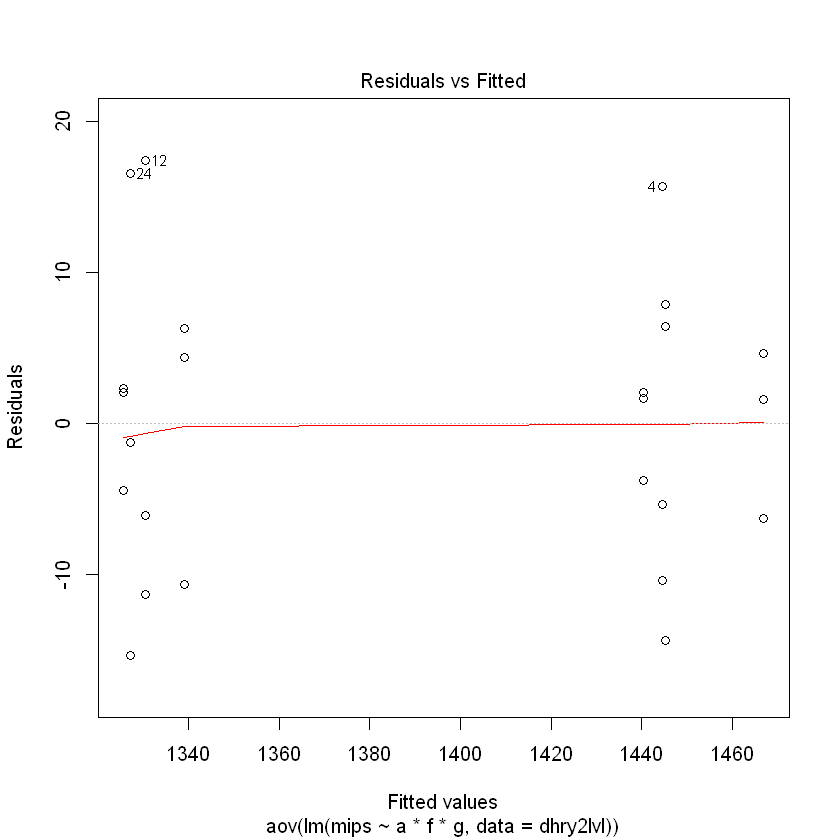

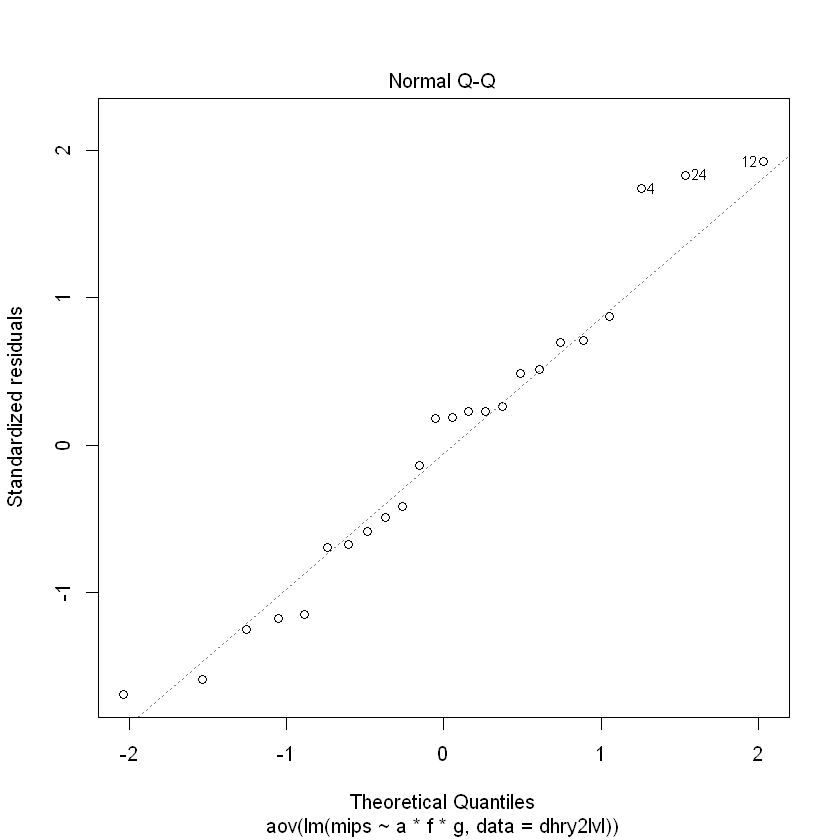

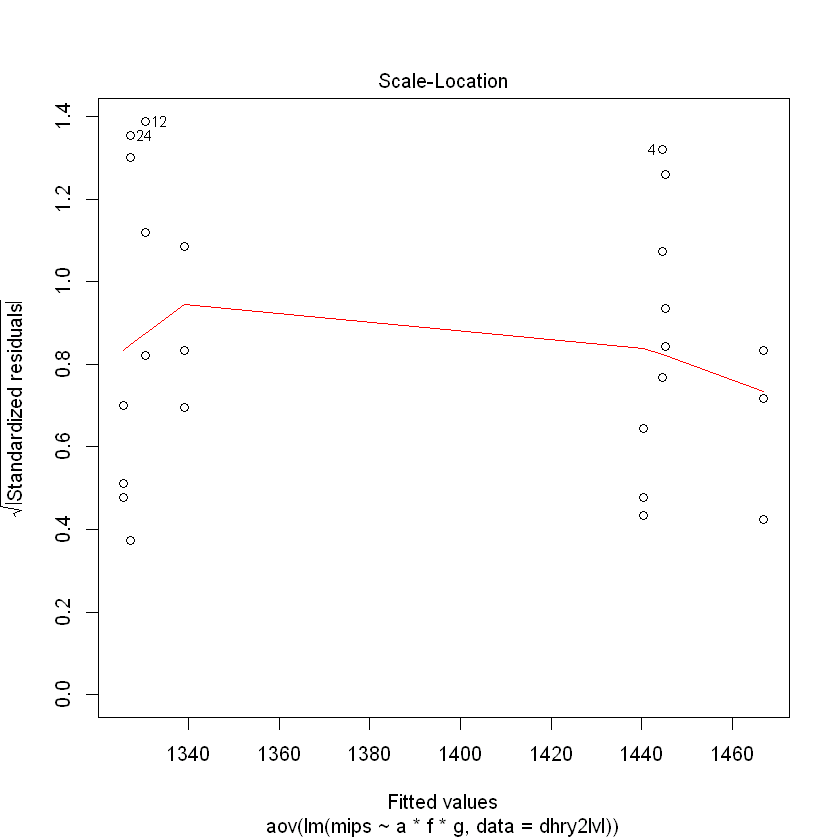

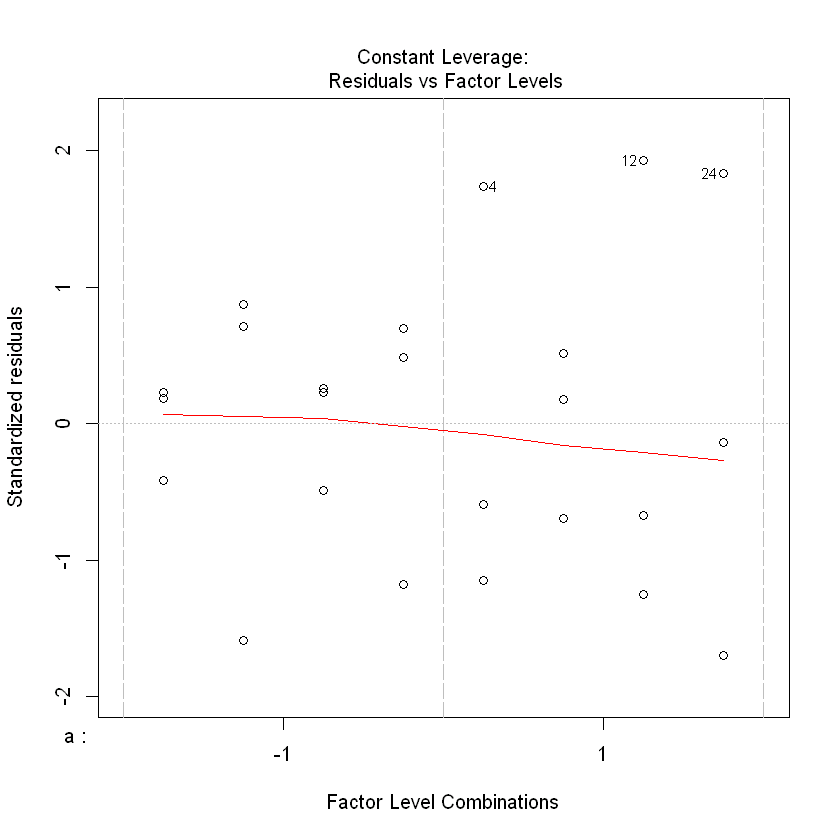

In [65]:
plot(aov(lm(mips~a*f*g,data=dhry2lvl)))
#We first look at the residual vs fitted plot and see that there are no non-linear patterns in the residuals
#meaning that our model is reasonable.
#Next we look at Q-Q plot and see that the residuals are in a straight line implying that they are normally
#distributed meaning our model is reasonable. #4 is slightly off but does not seem to be too disruptive.
#Next we look at Scale location graph and see the line is horizontal suggesting an even spread meaning equal
#variance meaning our model is reasonable.
#Finally we look at constant leverage graph and notice that there are not any value that is a large outlier
#meaning that our model is reasonable.

## Problem #3 - 
The file OUTPUT-optlevel (see below) contains data from a 4*2*2 study with 2 replicates. The first column is the trial number (you shouldn't include this in you model, or you won't get any "residuals"). The first factor ('opt') has four levels (-O0, -O1, -O2, -O3). The second factor ('bits') has two levels (specifying -m32 or -m64 for compilation as a 32-bit or 64-bit application) and the third ('benchmark') has two levels (dhry11 or dhry21). In each case, the dependent variable is the performance in VAX MIPS (this is the output of the Dhrystone program). Use R to conduct an analysis of variance for this data.

In [5]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/l0lenc8prwfo7e3/OUTPUT-optlevels.orig?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
optlevels = read.csv(temporaryFile)
# optlevels # - this will have 32 rows

a) Set up a linear model. Treat the bits, progs and optimization level as catagorical factors.

In [40]:
summary(optlevels)
#We use the factor command on each of the 3 factors
optlevels$opt = factor(optlevels$opt)
optlevels$bits = factor(optlevels$bits)
optlevels$prog = factor(optlevels$prog)
#Print out results to verify it worked
summary(optlevels)

       r            opt            bits          prog          mips     
 Min.   :0.0   Min.   :0.00   Min.   :0.0   Min.   :0.0   Min.   :2800  
 1st Qu.:0.0   1st Qu.:0.75   1st Qu.:0.0   1st Qu.:0.0   1st Qu.:4851  
 Median :0.5   Median :1.50   Median :0.5   Median :0.5   Median :6372  
 Mean   :0.5   Mean   :1.50   Mean   :0.5   Mean   :0.5   Mean   :6556  
 3rd Qu.:1.0   3rd Qu.:2.25   3rd Qu.:1.0   3rd Qu.:1.0   3rd Qu.:8418  
 Max.   :1.0   Max.   :3.00   Max.   :1.0   Max.   :1.0   Max.   :9847  

       r       opt   bits   prog        mips     
 Min.   :0.0   0:8   0:16   0:16   Min.   :2800  
 1st Qu.:0.0   1:8   1:16   1:16   1st Qu.:4851  
 Median :0.5   2:8                 Median :6372  
 Mean   :0.5   3:8                 Mean   :6556  
 3rd Qu.:1.0                       3rd Qu.:8418  
 Max.   :1.0                       Max.   :9847  

b) Report the linear model. Note that R reports this differently for catagorical data. The report should be missing terms for "opt0", "bits0" and so on. Why is that? What does the intercept represent?

In [77]:
oplev= lm(mips~opt*bits*prog,data=optlevels)
summary(oplev)
#As stated in the previous problem the opt0,bits0,etc values were the first values in the levels section of each
#factor meaning that they were used to generate the model and were not included in the coefficient list.
#The general intercept is used to add onto each of the coefficient intercepts to generate the correct 
#intercept value for each coefficient. The coefficient intercepts represent the intercept value for each specific
#level (ex. opt1 represents the intercept for the rows where opt=1).


Call:
lm(formula = mips ~ opt * bits * prog, data = optlevels)

Residuals:
    Min      1Q  Median      3Q     Max 
-278.14  -71.26    0.00   71.26  278.14 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3077.7      134.3  22.921 1.16e-13 ***
opt1                504.3      189.9   2.656  0.01726 *  
opt2               4911.3      189.9  25.864 1.76e-14 ***
opt3               4486.1      189.9  23.624 7.24e-14 ***
bits1              2329.9      189.9  12.270 1.49e-09 ***
prog1               462.3      189.9   2.435  0.02700 *  
opt1:bits1         -634.6      268.5  -2.363  0.03113 *  
opt2:bits1         -808.9      268.5  -3.012  0.00827 ** 
opt3:bits1         -187.5      268.5  -0.698  0.49517    
opt1:prog1         -375.8      268.5  -1.400  0.18074    
opt2:prog1         -848.0      268.5  -3.158  0.00609 ** 
opt3:prog1         -194.8      268.5  -0.725  0.47867    
bits1:prog1        -472.5      268.5  -1.760  0.09759 .  
opt1:bits1:prog

c) Determine the percentage of variation attributable to each factor. You can do this using the anova table.

In [67]:
SQ3 = anova(lm(mips~opt*bits*prog,data=optlevels))
SS3 = SQ3[2][[1]]
SST3 = sum(SS3)
#Percent of variation of each factor is (in same order as lm equation)
(SS3/SST3)*100
#opt is the most important optimization at 83.11%

[1] 83.113681798 16.151230971  0.031453945  0.128591753  0.052633057
[6]  0.002550398  0.196631923  0.323226155

d) Compute the 95% confidence interval for the "opt" factor.  The "anova" function doesn't do this, but you can see something similar using

     confint( aov (l ) )
     
where 'l' is your linear model. For models involving factors, the confidence interval is expressed for the different levels in each categorical factor.

In [79]:
#For opt1
#Upper bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.975,16)*summary(oplev)$coefficient[2,2]+summary(oplev)$coefficient[2,1]
#Lower bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.025,16)*summary(oplev)$coefficient[2,2]+summary(oplev)$coefficient[2,1]

#For opt2
#Upper bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.975,16)*summary(oplev)$coefficient[3,2]+summary(oplev)$coefficient[3,1]
#Lower bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.025,16)*summary(oplev)$coefficient[3,2]+summary(oplev)$coefficient[3,1]

#For opt3
#Upper bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.975,16)*summary(oplev)$coefficient[4,2]+summary(oplev)$coefficient[4,1]
#Lower bound (Use qt to get the value to multiply the standard error with and add to mean)
qt(0.025,16)*summary(oplev)$coefficient[4,2]+summary(oplev)$coefficient[4,1]

#Verify with given function
confint(aov(lm(mips~opt*bits*prog,data=optlevels)))

[1] 906.8732

[1] 101.7688

[1] 5313.827

[1] 4508.722

[1] 4888.639

[1] 4083.535

,2.5 %,97.5 %
(Intercept),2793.061,3362.355
opt1,101.7688,906.8732
opt2,4508.722,5313.827
opt3,4083.535,4888.639
bits1,1927.361,2732.465
prog1,59.74181,864.84619
opt1:bits1,-1203.84477,-65.25523
opt2:bits1,-1378.2248,-239.6352
opt3:bits1,-756.7533,381.8363
opt1:prog1,-945.1343,193.4553


e) Plot out the diagnostic plots for the model. You can do this using "plot(aov(l))" where "l" is your model. Can you justify that your model is reasonable

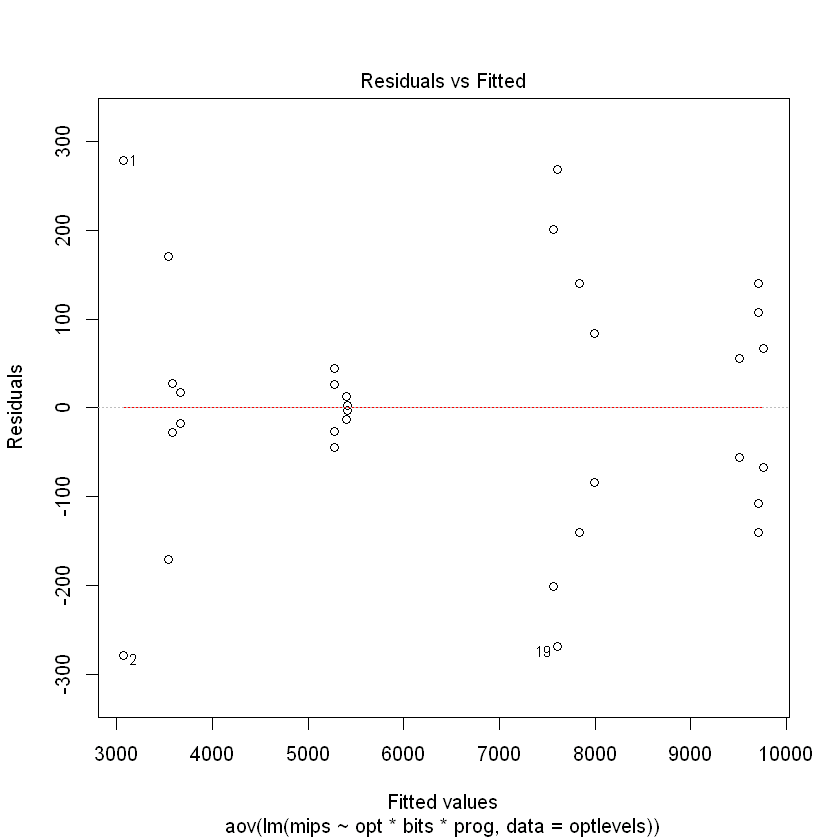

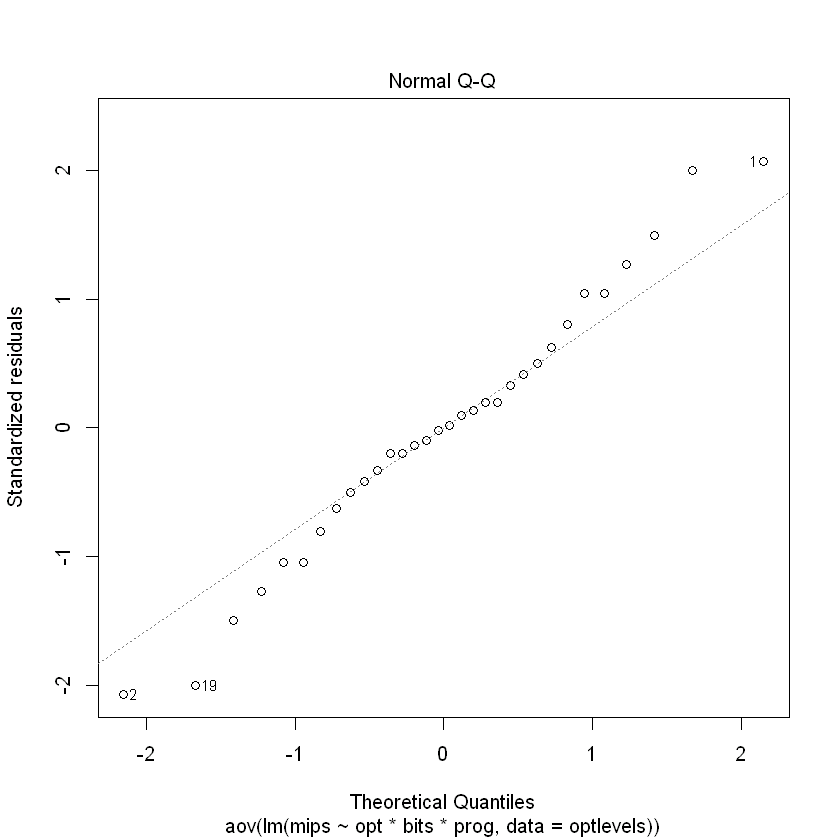

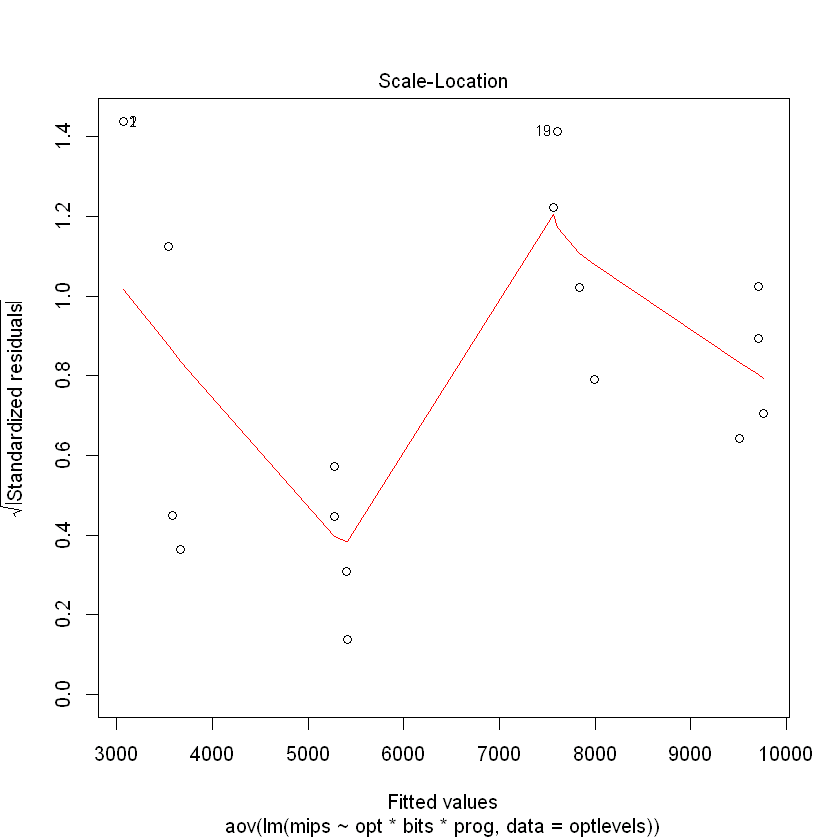

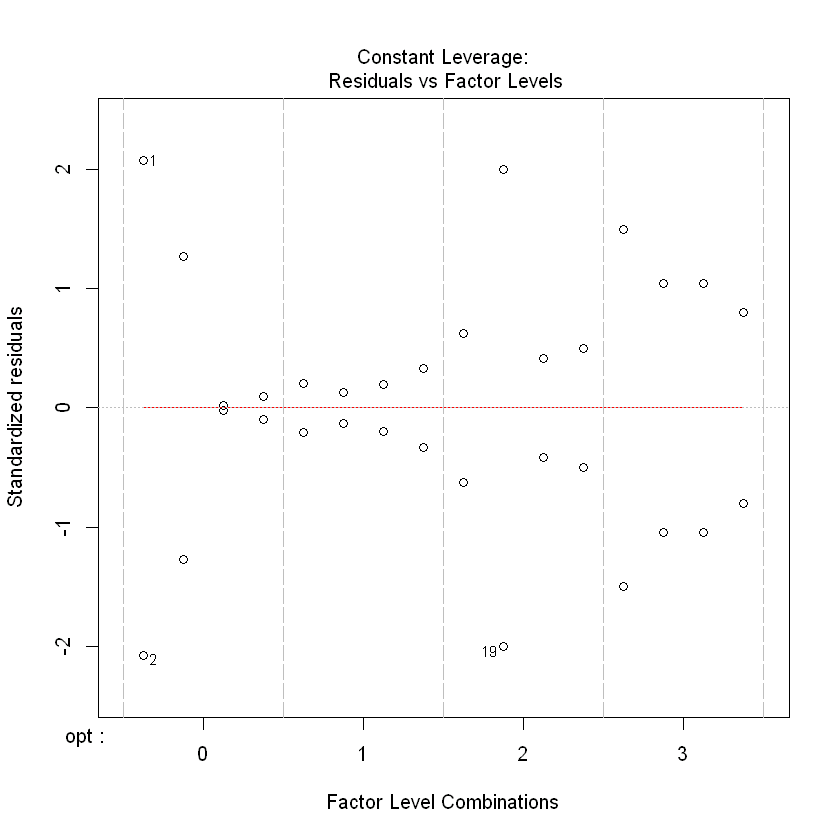

In [80]:
plot(aov(lm(mips~opt*bits*prog,data=optlevels)))
#We first look at the residual vs fitted plot and see that there are no non-linear patterns in the residuals
#meaning that our model is reasonable.
#Next we look at Q-Q plot and see that the residuals are in a straight line implying that they are normally
#distributed meaning our model is reasonable. #19 is slightly off but does not seem to be too disruptive.
#Next we look at Scale location graph and see the line is zigzaging suggesting that the residuals are not
#randomly spread indicating a possible problem with the model.
#Finally we look at constant leverage graph and notice that there are not any value that is a large outlier
#meaning that our model is reasonable.

## Problem #4 - 
This file (OUTPUT-21.csv) contains a $3*2^7$ experiment. The data was generated from the dhrystone 2.1 benchmark on a specific machine. The factors in the experiment correspond to different optimizations as indicated in the RUN script:

    DATA = ( 
    ('-fstrength-reduce', '-fno-strength-reduce'), # a 
    ('-fgcse', '-fno-gcse'), # b 
    ('-floop-optimize', '-fno-loop-optimize'), # c 
    ('-fpeephole', '-fno-peephole'), # d 
    ('-finline-functions', '-fno-inline-functions'), # e 
    ('-fomit-frame-pointer', '-fno-omit-frame-pointer'), # f 
    ('-fwhole-program', '-fno-whole-program') # g 
    ) 

each factor has two levels - either the optimization is enabled or not. In my model, I called the factors o.a, o.b, o.c, etc for the different possible optimizations.

In [84]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/0hq1r63ym1h904q/OUTPUT-21.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
fullOpt = read.csv(temporaryFile)
#fullOpt # - if you print this out, it will have 384 rows


a) There are several terms that contribute more variation to the results than the error/residual term, but most of the terms contribute little variation to the overall performance. Determine which single factor contributes in some meaningful way to variation in performance and report the percentage of variation explained by that single term. Explain how you did this.

In [112]:
#First we setup the linear model
#We use the factor command on each of the 7 factors
fullOpt$o.a = factor(fullOpt$o.a)
fullOpt$o.b = factor(fullOpt$o.b)
fullOpt$o.c = factor(fullOpt$o.c)
fullOpt$o.d = factor(fullOpt$o.d)
fullOpt$o.e = factor(fullOpt$o.e)
fullOpt$o.f = factor(fullOpt$o.f)
fullOpt$o.g = factor(fullOpt$o.g)
#We can determine the factor that contributes the most by finding the Sum Square value using anova
fulo = lm(mips~o.a*o.b*o.c*o.d*o.e*o.f*o.g,data=fullOpt)
SQ4 = anova(fulo)
#The percent of variation for each factor is the Sum Square divided by the sum of all Sum square.
#This means the variable with the highest Sum Square value will have the largest percentage of variation.
#We find the max index in the Sum square column by using
which(SQ4[2][[1]] == max(SQ4[2][[1]]), arr.ind = TRUE)
#The index returned is 6 which corresponds to o.f
#To get the percentage of variance explained by o.f we calculate the percentage of variance for all factors
SS4 = SQ4[2][[1]]
SST4 = sum(SS4)
Results = (SS4/SST4)*100
#Then we return the corresponding value for o.f
Results[6]
#This gives us 65% of the variation is due to o.f

[1] 6

[1] 64.99678

b) What 2-factor interaction of factors contributes in some meaningful way to variation in performance. Explain how you determine which factors you're including.

In [105]:
#To find out which two factor interactions contribute meaningfully to performance we have to go back to the 
#anova table and find the subset where the p-value is less than 0.05(significant).
SQ5 = subset(SQ4,SQ4[5]<0.05)
SQ5
#From this table we can see that there is only one 2-factor interaction with a p-value below 0.05 
#and that is the o.c:o.f interaction.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
o.c,1,11993.07,11993.07,4.194915,0.04156553
o.f,1,2077012,2077012,726.4939,9.973427e-77
o.c:o.f,1,18187.57,18187.57,6.361619,0.01226866
o.a:o.b:o.c,1,11937.6,11937.6,4.175515,0.04203591
o.a:o.b:o.e,1,14477.27,14477.27,5.063837,0.02527951
o.c:o.d:o.e:o.g,1,12459.28,12459.28,4.357988,0.03782466
o.a:o.c:o.f:o.g,1,12197.22,12197.22,4.266323,0.03988151
o.b:o.c:o.e:o.f:o.g,1,19859.37,19859.37,6.946378,0.008911572
o.a:o.b:o.c:o.d:o.e:o.g,1,24352.69,24352.69,8.518043,0.003829185


c) There any two significant intercations that involve more than 2 factors. List those & explain how you did this.

In [106]:
#As seen in the table above there are 6 interactions in which more than 2 factors are involved.
#They have a p-value of less than 0.05 in the anova table meaning the interactions are siginificant.
#The list is o.a:o.b:o.c and o.a:o.b:o.e for 3 factor interactions.
#There is o.a:o.c:o.f:o.g and o.c:o.d:o.e:o.g for 4 factor interactions.
#Finally there is o.b:o.c:o.e:o.f:o.g for 5 factor interaction and o.a:o.b:o.c:o.d:o.e:o.g for 6 factor interaction.

## Problem #5 - reduced
I've taken the data from the previous question and prepared a $3 * 2^{7-4}$ design table.  You're  left with a 24 row table (8 factors, repeated 3 times). This is in the following table.

In [120]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/n9urefzm9jzggh6/OUTPUT-21-reduced.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
reducedOpt = read.csv(temporaryFile)
 #reducedOpt # if you print this out, it will have 24 rows

a) Again, there should be a single factor that explains the most variation, but the percentage of variation explained by that factor should now be different. Compute the percentage for that single factor.

In [113]:
#We repeat the steps in the previous problem:
#First we setup the linear model
#We use the factor command on each of the 7 factors
reducedOpt$o.a = factor(reducedOpt$o.a)
reducedOpt$o.b = factor(reducedOpt$o.b)
reducedOpt$o.c = factor(reducedOpt$o.c)
reducedOpt$o.d = factor(reducedOpt$o.d)
reducedOpt$o.e = factor(reducedOpt$o.e)
reducedOpt$o.f = factor(reducedOpt$o.f)
reducedOpt$o.g = factor(reducedOpt$o.g)
#We can determine the factor that contributes the most by finding the Sum Square value using anova
rulo = lm(mips~o.a*o.b*o.c*o.d*o.e*o.f*o.g,data=reducedOpt)
SQ5 = anova(rulo)
#The percent of variation for each factor is the Sum Square divided by the sum of all Sum square.
#This means the variable with the highest Sum Square value will have the largest percentage of variation.
#We find the max index in the Sum square column by using
which(SQ5[2][[1]] == max(SQ5[2][[1]]), arr.ind = TRUE)
#The index returned is 6 which corresponds to o.f
#To get the percentage of variance explained by o.f we calculate the percentage of variance for all factors
SS5 = SQ5[2][[1]]
SST5 = sum(SS5)
Results2 = (SS5/SST5)*100
#Then we return the corresponding value for o.f
Results2[6]
#This gives us 76.27% of the variation is due to o.f

[1] 6

[1] 76.27427

b) Now, determine why that variation is different. Show that the "F" factor is confounded with the ABCDEG factor and explain why that changes the variation attributed to F.

In [125]:
#The variation changed from 65% to 76% of the variation primarily due to the removal of a large amount
#of information. Previously there was 384 rows but that was reduced to 24 rows meaning there is less data
#to be used in determining the effect of each factor so all interactions variations are N/A.

#Since ABCDEG is not contributing to the variance we can check the difference in the variance of F by
#finding the percent change in o.f. The change we get is
(Results2[6]-Results[6])/Results[6]
#This is approximately 17% change and many statisticans characterize a change of over 10% as an indication
#of confounding. With the removal of the confounding variable F is now able to be fully attributed to the 
#variation it is causing.

[1] 0.1735084